In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Simple Linear Regression  (30 points)

### Background

Remember from the course material: In Linear Regression, we aim to find the line that fits the given data as well as possible. The line formula is:

### <center> $ \hat{y} = f(x) = \beta_0 + \beta_1 x $ <center> 

And using linear regression, the goal is to find the $\beta_0$ and $\beta_1$ such that the the Mean Squared Error (MSE) is minimized:
    
### <center> $ MSE \Rightarrow \mathcal{L} = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i ))^2 $ <center> 
    
As the MSE error gets smaller, the line starts to represent the data better and better.
    
Consider $\beta = (\beta_0 + \beta_1)$. In order to find the $\beta$ that minimizes the MSE loss, we use **Gradient Descent**. Iteratively $\beta$ is updated in the opposite direction of the gradient, while the size of the update is controlled with the learning rate $\eta$:
    
### <center> $ \beta \leftarrow \beta-\eta \frac{d \mathcal{L}}{d \beta} $ <center> 

### Your Task

In this part, you are going to code up Simple Linear Regression on the data given in **data1.csv**, and find the line that fits the data best. To do so, you'll need to complete the following:

- Code up the gradient descent, and print the loss value at every time step. You can use the number of steps as the stopping criteria (e.g. stopping gradient descent after 10 steps). 
- At the end of the algorithm, plot the found line with the data.
    
Given learning rate and number of iterations as default values in the code should work, but you are free to change them to make your algorithm faster if you'd like. You are not allowed to use any libraries other than the imported ones at the beginning. You can initialize the $\beta$ randomly.

In [16]:
def load_data():
    df = pd.read_csv("data1.csv")
    x = df['x'].values
    y = df['y'].values
    return x, y


def gradient_descent(x, y, learning_rate = 0.1, max_its = 500):
    #TO DO: Initialize the beta values
    beta0 = 0.5
    beta1 = 0.5

    # start gradient descent loop
    for k in range(0,max_its):
        length=float(len(x))
        y_new=beta0+beta1*x
        # TO DO: calculate derivative (grad)
        beta1_updated=(-2/length)*sum(x*(y-y_new))
        beta0_updated=(-2/length)*sum(y-y_new) 
               
        
        # TO DO: take gradient descent step
        beta1=beta1-learning_rate*beta1_updated
        beta0=beta0-learning_rate*beta0_updated
        
        
        # TO DO: calculate and print the loss value
        loss=(1/(length))*sum((y-y_new)**2)
        print("Iteration number {} is {}".format(k+1,loss))

    return beta0, beta1

Iterationn number 1 is 0.9787945508554944
Iterationn number 2 is 0.569513063955439
Iterationn number 3 is 0.3317566990998196
Iterationn number 4 is 0.19364069398043085
Iterationn number 5 is 0.11340661118892556
Iterationn number 6 is 0.06679663772757598
Iterationn number 7 is 0.0397192140684632
Iterationn number 8 is 0.023988439096095052
Iterationn number 9 is 0.014849056177623112
Iterationn number 10 is 0.009538697668342495
Iterationn number 11 is 0.00645268118308256
Iterationn number 12 is 0.00465883303366762
Iterationn number 13 is 0.0036156452618053016
Iterationn number 14 is 0.003008550792622208
Iterationn number 15 is 0.002654814354309793
Iterationn number 16 is 0.0024482828480706913
Iterationn number 17 is 0.0023272903932752683
Iterationn number 18 is 0.0022560141096515814
Iterationn number 19 is 0.002213643540790071
Iterationn number 20 is 0.002188089084730424
Iterationn number 21 is 0.002172327170272825
Iterationn number 22 is 0.002162277140093833
Iterationn number 23 is 0.002

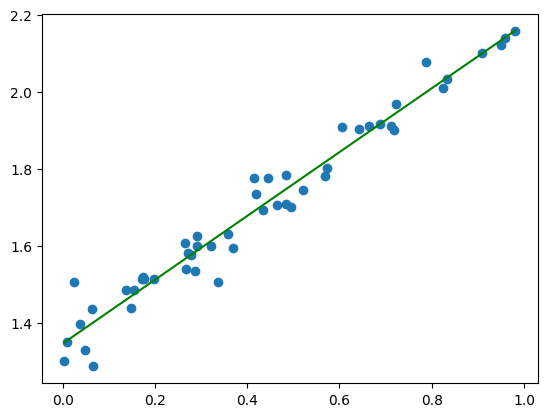

In [18]:
x, y = load_data()
beta0, beta1 = gradient_descent(x, y)
y_new=beta0+beta1*x

# TO DO: Plot the data AND the line!

plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(y_new),max(y_new)],color='green')
plt.show()


# Part 2: Multi Linear Regression on California House Pricing Dataset using 5-fold Cross Validation (50 points)

In this part, you are going to train a Multi Linear Regression Model on a real dataset! The dataset we are going to use is **California House Pricing Dataset**. The target is to predict the median house value in California, given the 8 features ( You can examine the name of the features when you run the load_data function given below ). In this part, you will also use Cross-Validation with 5 folds, in addition to everything you implemented in Part 1. You will also alter your code so that it works with multiple attribute. In this case, you will have 8 features and you can code up assuming you will always have 8 features. At the end, you will report your results. 

In summary, you will need to do the following:

- Code up gradient descent with Cross Validation for Multi Linear Regression
- Find the best working learning rate and number of iterations setup.
- Report the MSE loss periodically during training in folds (For example, if you are training for 1000 steps, you can print MSE loss for each 100 steps. If you are training for 100000 steps ( which you can, if you'd like ), you can print MSE loss for each 10000 steps. In total, if you print the loss 10 times periodically for each fold, it's fine ).
- Save the final MSE results on the testing set on each fold in an array. Print the average testing MSE losses at the end of the algorithm. Additionally, print the variance of the testing MSE losses. 

In this part, we are giving you only the load_data function, so you are flying solo for Multi Linear Regression! It is up to you to find the working learning rate and number of iterations setup. In addition to the libraries imported for Part 1, you are allowed to use sklearn for fetching dataset (which is already done for you), and the KFold class for the cross-validation. Other than that, you are not allowed to use sklearn or any other additional libraries.



In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
def load_data():
    data= fetch_california_housing()
    print("Features of Boston Housing Prices dataset: ", data.get("feature_names"))
    print("Shape of the X: ", data.data.shape)
    print("Shape of the Y: ", data.target.shape)
    return data.data, data.target


def multiple_gradient_descent_KFold(x,y,learning_rate,max_its):
    
    MSE_avg=0 
    var=0
    x=(x-x.mean())/x.std()
    x=np.c_[np.ones(x.shape[0]),x]
    beta=np.zeros(x.shape[1])
    Train_x=[]
    Train_y=[]
    Test_y=[]
    Test_MSE=[] 
    Test_x=[]
    MSE_array=[]
    y_new=[]
    Train_array=[]
    Test_array=[]
    kfold=KFold(n_splits=5)
       
    for Train_array, Test_array in kfold.split(x):

        Train_x,Test_x=x[Train_array], x[Test_array]


    for Train_array, Test_array in kfold.split(y):

        Train_y,Test_y=y[Train_array], y[Test_array]
        
        
    for i in range(max_its):

        y_new=np.dot(x[Train_array],beta.T)
        rate_Error=y_new-y[Train_array]
        Deriv=(1/len(x[Train_array]))*learning_rate*np.dot(x[Train_array].T,rate_Error)
        beta=beta-Deriv
        MSE=(1/len(x[Train_array]))*sum((y[Train_array]-y_new)**2)
        MSE_array.append(MSE)
        if i%10000==0:
            print("{}. step MSE is {}".format(i,MSE_array[i]))
        MSE_avg=np.mean(MSE_array)
        var=np.var(MSE_array)
        
    for i in range(len(y[Test_array])):

        mse_Test=(1/len(y[Test_array]))*sum((y[Test_array]-y_new[-1])**2)
        Test_MSE.append(mse_Test)
        Test_average_mse=np.mean(Test_MSE)  
        Var_test=np.var(Test_MSE)

    print("Average of Test MSE is {}".format(Test_average_mse))
    print("Variance of Test MSE  is {}".format(Var_test))

In [3]:
x, y = load_data()
multiple_gradient_descent_KFold(x, y,0.12,120000)

Features of Boston Housing Prices dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of the X:  (20640, 8)
Shape of the Y:  (20640,)
0. step MSE is 5.371790522291242
10000. step MSE is 1.2653167835999912
20000. step MSE is 1.246278016894708
30000. step MSE is 1.2300539211766244
40000. step MSE is 1.2152282346824848
50000. step MSE is 1.2012136725010474
60000. step MSE is 1.1877601720920243
70000. step MSE is 1.1747554271909428
80000. step MSE is 1.1621439089707242
90000. step MSE is 1.1498939291487487
100000. step MSE is 1.1379841906502794
110000. step MSE is 1.1263982503586083
Average of Test MSE is 1.5960146954467875
Variance of Test MSE  is 1.9721522630525295e-31
